In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import mode
from keras.models import Model
from keras.layers import Input, BatchNormalization, LSTM, Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from keras.metrics import Precision, Recall

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pyttsx3  # require to install espeak (sudo apt/dnf install espeak)

2023-04-16 22:53:31.211283: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-16 22:53:31.473003: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-16 22:53:31.474320: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-16 22:53:35.122937: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv('../data/words.csv')
X = df[['flex_1', 'flex_2', 'flex_3', 'flex_4', 'flex_5', 'GYRx', 'GYRy', 'GYRz', 'ACCx', 'ACCy', 'ACCz']].values
labels = df.iloc[:, -1]
label_dict = {label: i for i, label in enumerate(sorted(set(labels)))}
y = np.array([label_dict[label] for label in labels])
y = to_categorical(y, num_classes=len(label_dict))

print(label_dict)

print(X.shape, y.shape)
X = np.reshape(X, (X.shape[0]//150, 150, X.shape[1]))
y = np.reshape(y, (y.shape[0]//150, 150, y.shape[1]))
print(X.shape, y.shape)

{'bad': 0, 'deaf': 1, 'fine': 2, 'good': 3, 'goodbye': 4, 'hello': 5, 'hungry': 6, 'me': 7, 'no': 8, 'please': 9, 'sorry': 10, 'thankyou': 11, 'yes': 12, 'you': 13}
(525000, 11) (525000, 14)
(3500, 150, 11) (3500, 150, 14)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(2240, 150, 11) (700, 150, 11) (560, 150, 11)
(2240, 150, 14) (700, 150, 14) (560, 150, 14)


In [4]:
input_layer = Input(shape=(150, 11), name='input_layer')
batch_layer = BatchNormalization(name='hidden_layer1')(input_layer)
lstm_layer = LSTM(units=64, return_sequences=True, name='hidden_layer2')(batch_layer)
output_layer = Dense(units=len(label_dict), activation='softmax', name='output_layer')(lstm_layer)
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy', Precision(), Recall()])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

2023-04-16 22:54:14.039939: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-16 22:54:14.041040: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-04-16 22:54:14.470438: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gra

Epoch 1/50


2023-04-16 22:54:15.223524: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-16 22:54:15.226635: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-16 22:54:15.228793: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

70/70 [==============================] - ETA: 0s - loss: 1.8840 - accuracy: 0.4971 - precision: 0.9545 - recall: 0.0809

2023-04-16 22:54:22.072866: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-16 22:54:22.074724: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-16 22:54:22.076780: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

70/70 [==============================] - 8s 86ms/step - loss: 1.8840 - accuracy: 0.4971 - precision: 0.9545 - recall: 0.0809 - val_loss: 1.1923 - val_accuracy: 0.6688 - val_precision: 0.9137 - val_recall: 0.3380
Epoch 2/50
70/70 [==============================] - 5s 76ms/step - loss: 0.9278 - accuracy: 0.7527 - precision: 0.9077 - recall: 0.5333 - val_loss: 0.7408 - val_accuracy: 0.7827 - val_precision: 0.9217 - val_recall: 0.6562
Epoch 3/50
70/70 [==============================] - 5s 72ms/step - loss: 0.6886 - accuracy: 0.7991 - precision: 0.9099 - recall: 0.6848 - val_loss: 0.5713 - val_accuracy: 0.8269 - val_precision: 0.9225 - val_recall: 0.7284
Epoch 4/50
70/70 [==============================] - 5s 71ms/step - loss: 0.6035 - accuracy: 0.8127 - precision: 0.9022 - recall: 0.7248 - val_loss: 0.5314 - val_accuracy: 0.8366 - val_precision: 0.8978 - val_recall: 0.7613
Epoch 5/50
70/70 [==============================] - 5s 78ms/step - loss: 0.5488 - accuracy: 0.8302 - precision: 0.9012 

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 150, 11)]         0         
                                                                 
 hidden_layer1 (BatchNormali  (None, 150, 11)          44        
 zation)                                                         
                                                                 
 hidden_layer2 (LSTM)        (None, 150, 64)           19456     
                                                                 
 output_layer (Dense)        (None, 150, 14)           910       
                                                                 
Total params: 20,410
Trainable params: 20,388
Non-trainable params: 22
_________________________________________________________________


In [6]:
results = model.evaluate(X_test, y_test)
print("Test loss:", results[0])
print("Test accuracy:", results[1])
print("Test precision:", results[2])
print("Test recall:", results[3])

22/22 [==============================] - 1s 30ms/step - loss: 0.2252 - accuracy: 0.9138 - precision: 0.9503 - recall: 0.8836
Test loss: 0.22516028583049774
Test accuracy: 0.9137523770332336
Test precision: 0.9502949714660645
Test recall: 0.883647620677948


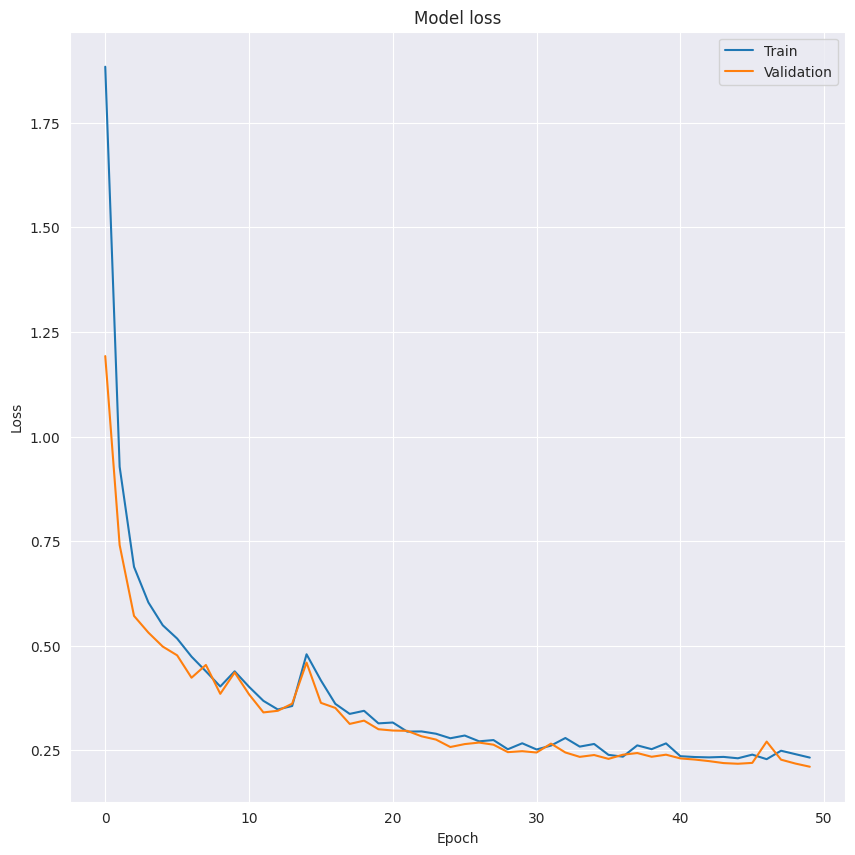

In [7]:
plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

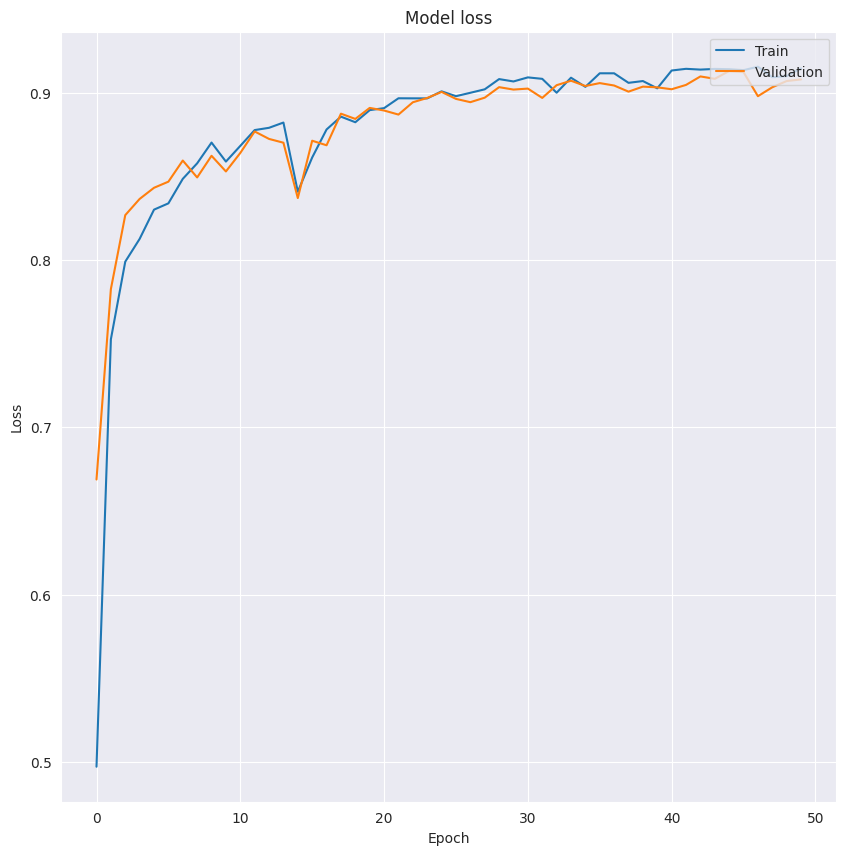

In [8]:
plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [9]:
model.save('../models/words.h5')

In [10]:
y_pred = model.predict(X_test)
predictions = np.argmax(y_pred, axis=2)
print(predictions)
major = mode(predictions, axis=1)[0].squeeze()
count = mode(predictions, axis=1)[1].squeeze()
print(f"Predictions    : {major}")
print(f"Appeared times : {count}")

 1/22 [>.............................] - ETA: 10s

2023-04-16 22:59:41.394974: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-16 22:59:41.399559: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-16 22:59:41.401574: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

22/22 [==============================] - 1s 24ms/step
[[ 9  9  9 ...  9  9  9]
 [ 0  0  0 ...  3  3  3]
 [ 0  0  0 ... 11 11 11]
 ...
 [ 3  3  3 ...  3  3  3]
 [ 8  8  8 ...  8  8  8]
 [ 9  9  9 ...  9  9  9]]
Predictions    : [ 9  3 11  4  0  6  4  7  2 13  6  0 10  5 11  1  6  1  9 13 13  8 12  6
  9  3 11  2  3  4  6  6  9 13  3 11 12 12  1  7  8  4  0 11  9  0  6 12
  4 12  3 13  4 12 10  1  0  8  6 12  0  6 11  7  7 13  1 11 10  9  4 13
 11 12  2  6  0  7 11  4 11 10  1  6  1  2  3 13 11 11 13  9  9 10 10  6
  8  4  3 12  5  1  7 12 11  2  5  4 13 11  1  5 10  5 11  4  3  8  7 10
  3  5  6  2 13  0  2  0 11 11 11  3  8  3 11  0 10  5 12  4  9  9 11 13
  8  2  9  4 10  3  1  8  8  5  0 13 13 13 12  1  7  1 12 11  3  7 13  5
  9  6 13  9 13  2  4 11  6  5  7 10  2  2 12  0  3  9  9  8  2 10 10 10
  2  1 13 10 10  5  0  5 12  1  9 11  7  7  0  5  0  5  8  8  5  7  6  3
  3  9  1 11  2 13 11  8  2  7  8 11  6  4  2 13  2  4  4  5  8 11  5 13
  7 10 11 10  3 13  1  6  6  1 12  9  3  8 

/tmp/ipykernel_9011/310183563.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  major = mode(predictions, axis=1)[0].squeeze()
/tmp/ipykernel_9011/310183563.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  count = mode(predictions, axis=1)[1].squeeze()


In [11]:
def get_key(dictionary, val):
    for key, value in dictionary.items():
        if val == value:
            return key

predictions_list = []
for word in major:
    predictions_list.append(get_key(label_dict, word))
print(predictions_list)

['please', 'good', 'thankyou', 'goodbye', 'bad', 'hungry', 'goodbye', 'me', 'fine', 'you', 'hungry', 'bad', 'sorry', 'hello', 'thankyou', 'deaf', 'hungry', 'deaf', 'please', 'you', 'you', 'no', 'yes', 'hungry', 'please', 'good', 'thankyou', 'fine', 'good', 'goodbye', 'hungry', 'hungry', 'please', 'you', 'good', 'thankyou', 'yes', 'yes', 'deaf', 'me', 'no', 'goodbye', 'bad', 'thankyou', 'please', 'bad', 'hungry', 'yes', 'goodbye', 'yes', 'good', 'you', 'goodbye', 'yes', 'sorry', 'deaf', 'bad', 'no', 'hungry', 'yes', 'bad', 'hungry', 'thankyou', 'me', 'me', 'you', 'deaf', 'thankyou', 'sorry', 'please', 'goodbye', 'you', 'thankyou', 'yes', 'fine', 'hungry', 'bad', 'me', 'thankyou', 'goodbye', 'thankyou', 'sorry', 'deaf', 'hungry', 'deaf', 'fine', 'good', 'you', 'thankyou', 'thankyou', 'you', 'please', 'please', 'sorry', 'sorry', 'hungry', 'no', 'goodbye', 'good', 'yes', 'hello', 'deaf', 'me', 'yes', 'thankyou', 'fine', 'hello', 'goodbye', 'you', 'thankyou', 'deaf', 'hello', 'sorry', 'hell

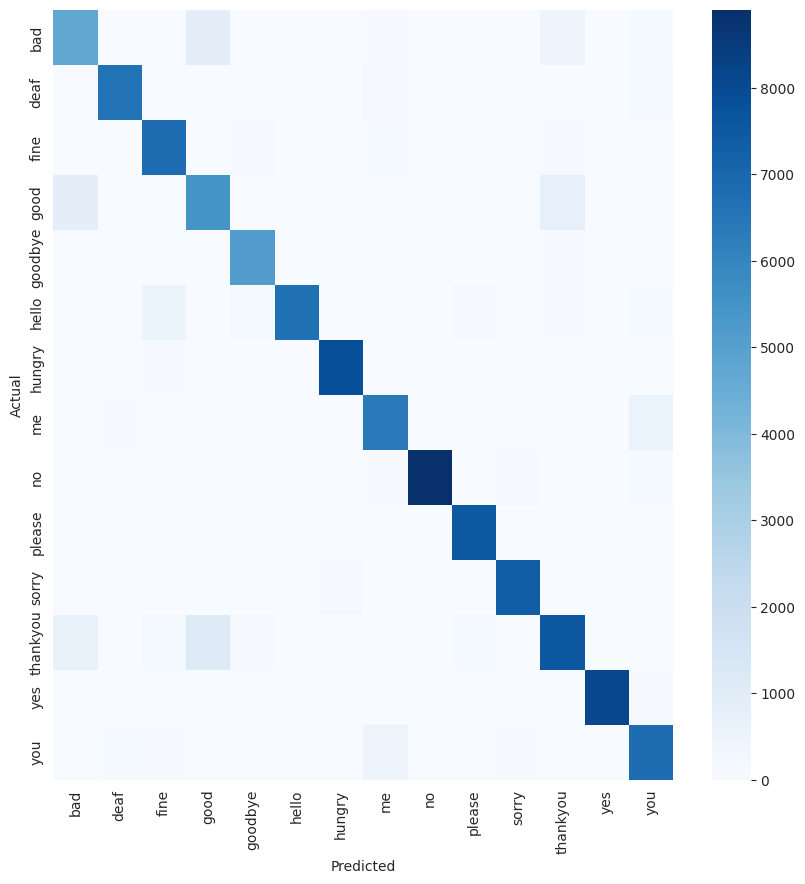

Accuracy: 91.38%


In [12]:
words_cm = confusion_matrix(y_test.argmax(axis=2).flatten(), y_pred.argmax(axis=2).flatten())
plt.subplots(figsize=(10, 10))
sns.heatmap(words_cm, annot=False, cmap='Blues', xticklabels=label_dict.keys(), yticklabels=label_dict.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
accuracy = np.sum(np.diag(words_cm)) / np.sum(words_cm)
print(f"Accuracy: {accuracy*100:.2f}%")

In [13]:
print(classification_report(y_test.argmax(axis=2).flatten(), y_pred.argmax(axis=2).flatten()))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75      6300
           1       0.98      0.96      0.97      6900
           2       0.90      0.97      0.93      7050
           3       0.73      0.76      0.74      7200
           4       0.94      0.98      0.96      5250
           5       1.00      0.88      0.93      7650
           6       0.98      0.99      0.99      7950
           7       0.89      0.90      0.90      7050
           8       1.00      0.97      0.98      9150
           9       0.96      1.00      0.98      7500
          10       0.97      0.98      0.98      7500
          11       0.84      0.77      0.81      9750
          12       0.99      0.98      0.99      8250
          13       0.85      0.91      0.88      7500

    accuracy                           0.91    105000
   macro avg       0.91      0.91      0.91    105000
weighted avg       0.91      0.91      0.91    105000



In [ ]:
engine = pyttsx3.init()
engine.say(", ".join(predictions_list))
engine.runAndWait()